In [1]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 97.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.4 MB/s eta 0:00:00


In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from transformers import BertTokenizer

In [4]:
data = pd.read_csv("task2ireddit.csv")

In [5]:
data = data.dropna()

In [6]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [7]:
tokens = []
for text in data["Generation"]:
  tokens.append(tokenizer.tokenize(text))

In [8]:
token_ids = []
for token in tokens:
  token_ids.append(tokenizer.convert_tokens_to_ids(token))

In [9]:
maxlen = 100
padded_sequences = pad_sequences(token_ids, maxlen=maxlen)

In [10]:
labels = pd.get_dummies(data["label"]).values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [12]:
y_test = np.argmax(y_test, axis=1)

In [13]:
model = Sequential()
model.add(Embedding(tokenizer.vocab_size + 1, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(2, activation="softmax"))

In [14]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [15]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
33/33 [==============================] - 19s 245ms/step - loss: 0.4060 - accuracy: 0.8091 - val_loss: 0.1631 - val_accuracy: 0.9459
Epoch 2/10
33/33 [==============================] - 6s 182ms/step - loss: 0.0376 - accuracy: 0.9903 - val_loss: 0.0815 - val_accuracy: 0.9730
Epoch 3/10
33/33 [==============================] - 6s 176ms/step - loss: 0.0083 - accuracy: 0.9981 - val_loss: 0.1435 - val_accuracy: 0.9691
Epoch 4/10
33/33 [==============================] - 5s 155ms/step - loss: 0.0074 - accuracy: 0.9990 - val_loss: 0.0354 - val_accuracy: 0.9884
Epoch 5/10
33/33 [==============================] - 5s 141ms/step - loss: 9.7793e-04 - accuracy: 1.0000 - val_loss: 0.0373 - val_accuracy: 0.9884
Epoch 6/10
33/33 [==============================] - 3s 82ms/step - loss: 5.9305e-04 - accuracy: 1.0000 - val_loss: 0.0392 - val_accuracy: 0.9884
Epoch 7/10
33/33 [==============================] - 2s 76ms/step - loss: 4.1810e-04 - accuracy: 1.0000 - val_loss: 0.0371 - val_accuracy: 0.

In [16]:
y_pred02 = model.predict(X_test)
y_pred02 = np.argmax(y_pred02, axis=1)

11/11 [==============================] - 1s 6ms/step


In [17]:
print(classification_report(y_test, y_pred02))
print(confusion_matrix(y_test, y_pred02))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       224
           1       1.00      1.00      1.00        99

    accuracy                           1.00       323
   macro avg       1.00      1.00      1.00       323
weighted avg       1.00      1.00      1.00       323

[[224   0]
 [  0  99]]


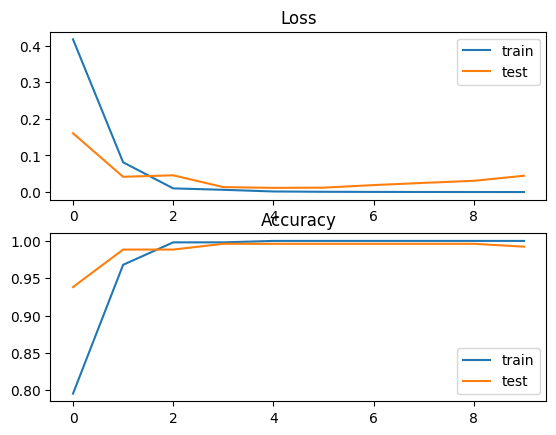

In [ ]:
from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()